In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from scipy.io import arff


data = arff.loadarff('CEE_DATA.arff')
df = pd.DataFrame(data[0])
df = df.rename({'Class_ X_Percentage': 'Class_X_Percentage'}, axis=1)
df.head()

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,b'Excellent',b'male',b'General',b'NO',b'ONE',b'SEBA',b'AHSEC',b'ENGLISH',b'Excellent',b'Excellent',b'DOCTOR',b'OTHERS'
1,b'Excellent',b'male',b'OBC',b'WA',b'TWO',b'SEBA',b'AHSEC',b'OTHERS',b'Excellent',b'Excellent',b'SCHOOL_TEACHER',b'HOUSE_WIFE'
2,b'Excellent',b'male',b'OBC',b'OA',b'TWO',b'OTHERS',b'CBSE',b'ENGLISH',b'Excellent',b'Excellent',b'BUSINESS',b'HOUSE_WIFE'
3,b'Excellent',b'male',b'General',b'WA',b'ONE',b'SEBA',b'AHSEC',b'OTHERS',b'Excellent',b'Excellent',b'SCHOOL_TEACHER',b'SCHOOL_TEACHER'
4,b'Excellent',b'male',b'General',b'OA',b'TWO',b'SEBA',b'CBSE',b'ENGLISH',b'Excellent',b'Excellent',b'COLLEGE_TEACHER',b'HOUSE_WIFE'


In [3]:
df.isnull().values.any()

False

In [4]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df.Performance = le.fit_transform(df['Performance'])
df.Gender = le.fit_transform(df['Gender'])
df.Caste = le.fit_transform(df['Caste'])
df.coaching = le.fit_transform(df['coaching'])
df.time = le.fit_transform(df['time'])
df.Class_ten_education= le.fit_transform(df['Class_ten_education'])
df.twelve_education = le.fit_transform(df['twelve_education'])
df.medium = le.fit_transform(df['medium'])
df.Class_X_Percentage = le.fit_transform(df['Class_X_Percentage'])
df.Class_XII_Percentage = le.fit_transform(df['Class_XII_Percentage'])
df.Father_occupation = le.fit_transform(df['Father_occupation'])
df.Mother_occupation = le.fit_transform(df['Mother_occupation'])
#df.Gender = le.fit_transform(df['Gender'])

df

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,1,1,0,0,2,2,0,1,1,1,4,7
1,1,1,1,2,5,2,0,2,1,1,7,6
2,1,1,1,1,5,1,1,1,1,1,1,6
3,1,1,0,2,2,2,0,2,1,1,7,8
4,1,1,0,1,5,2,1,1,1,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
661,0,0,3,2,2,2,0,1,2,3,6,6
662,0,1,3,2,4,2,0,1,3,2,3,6
663,0,1,3,2,5,2,1,1,2,3,6,8
664,0,1,3,2,4,2,0,1,2,2,7,6


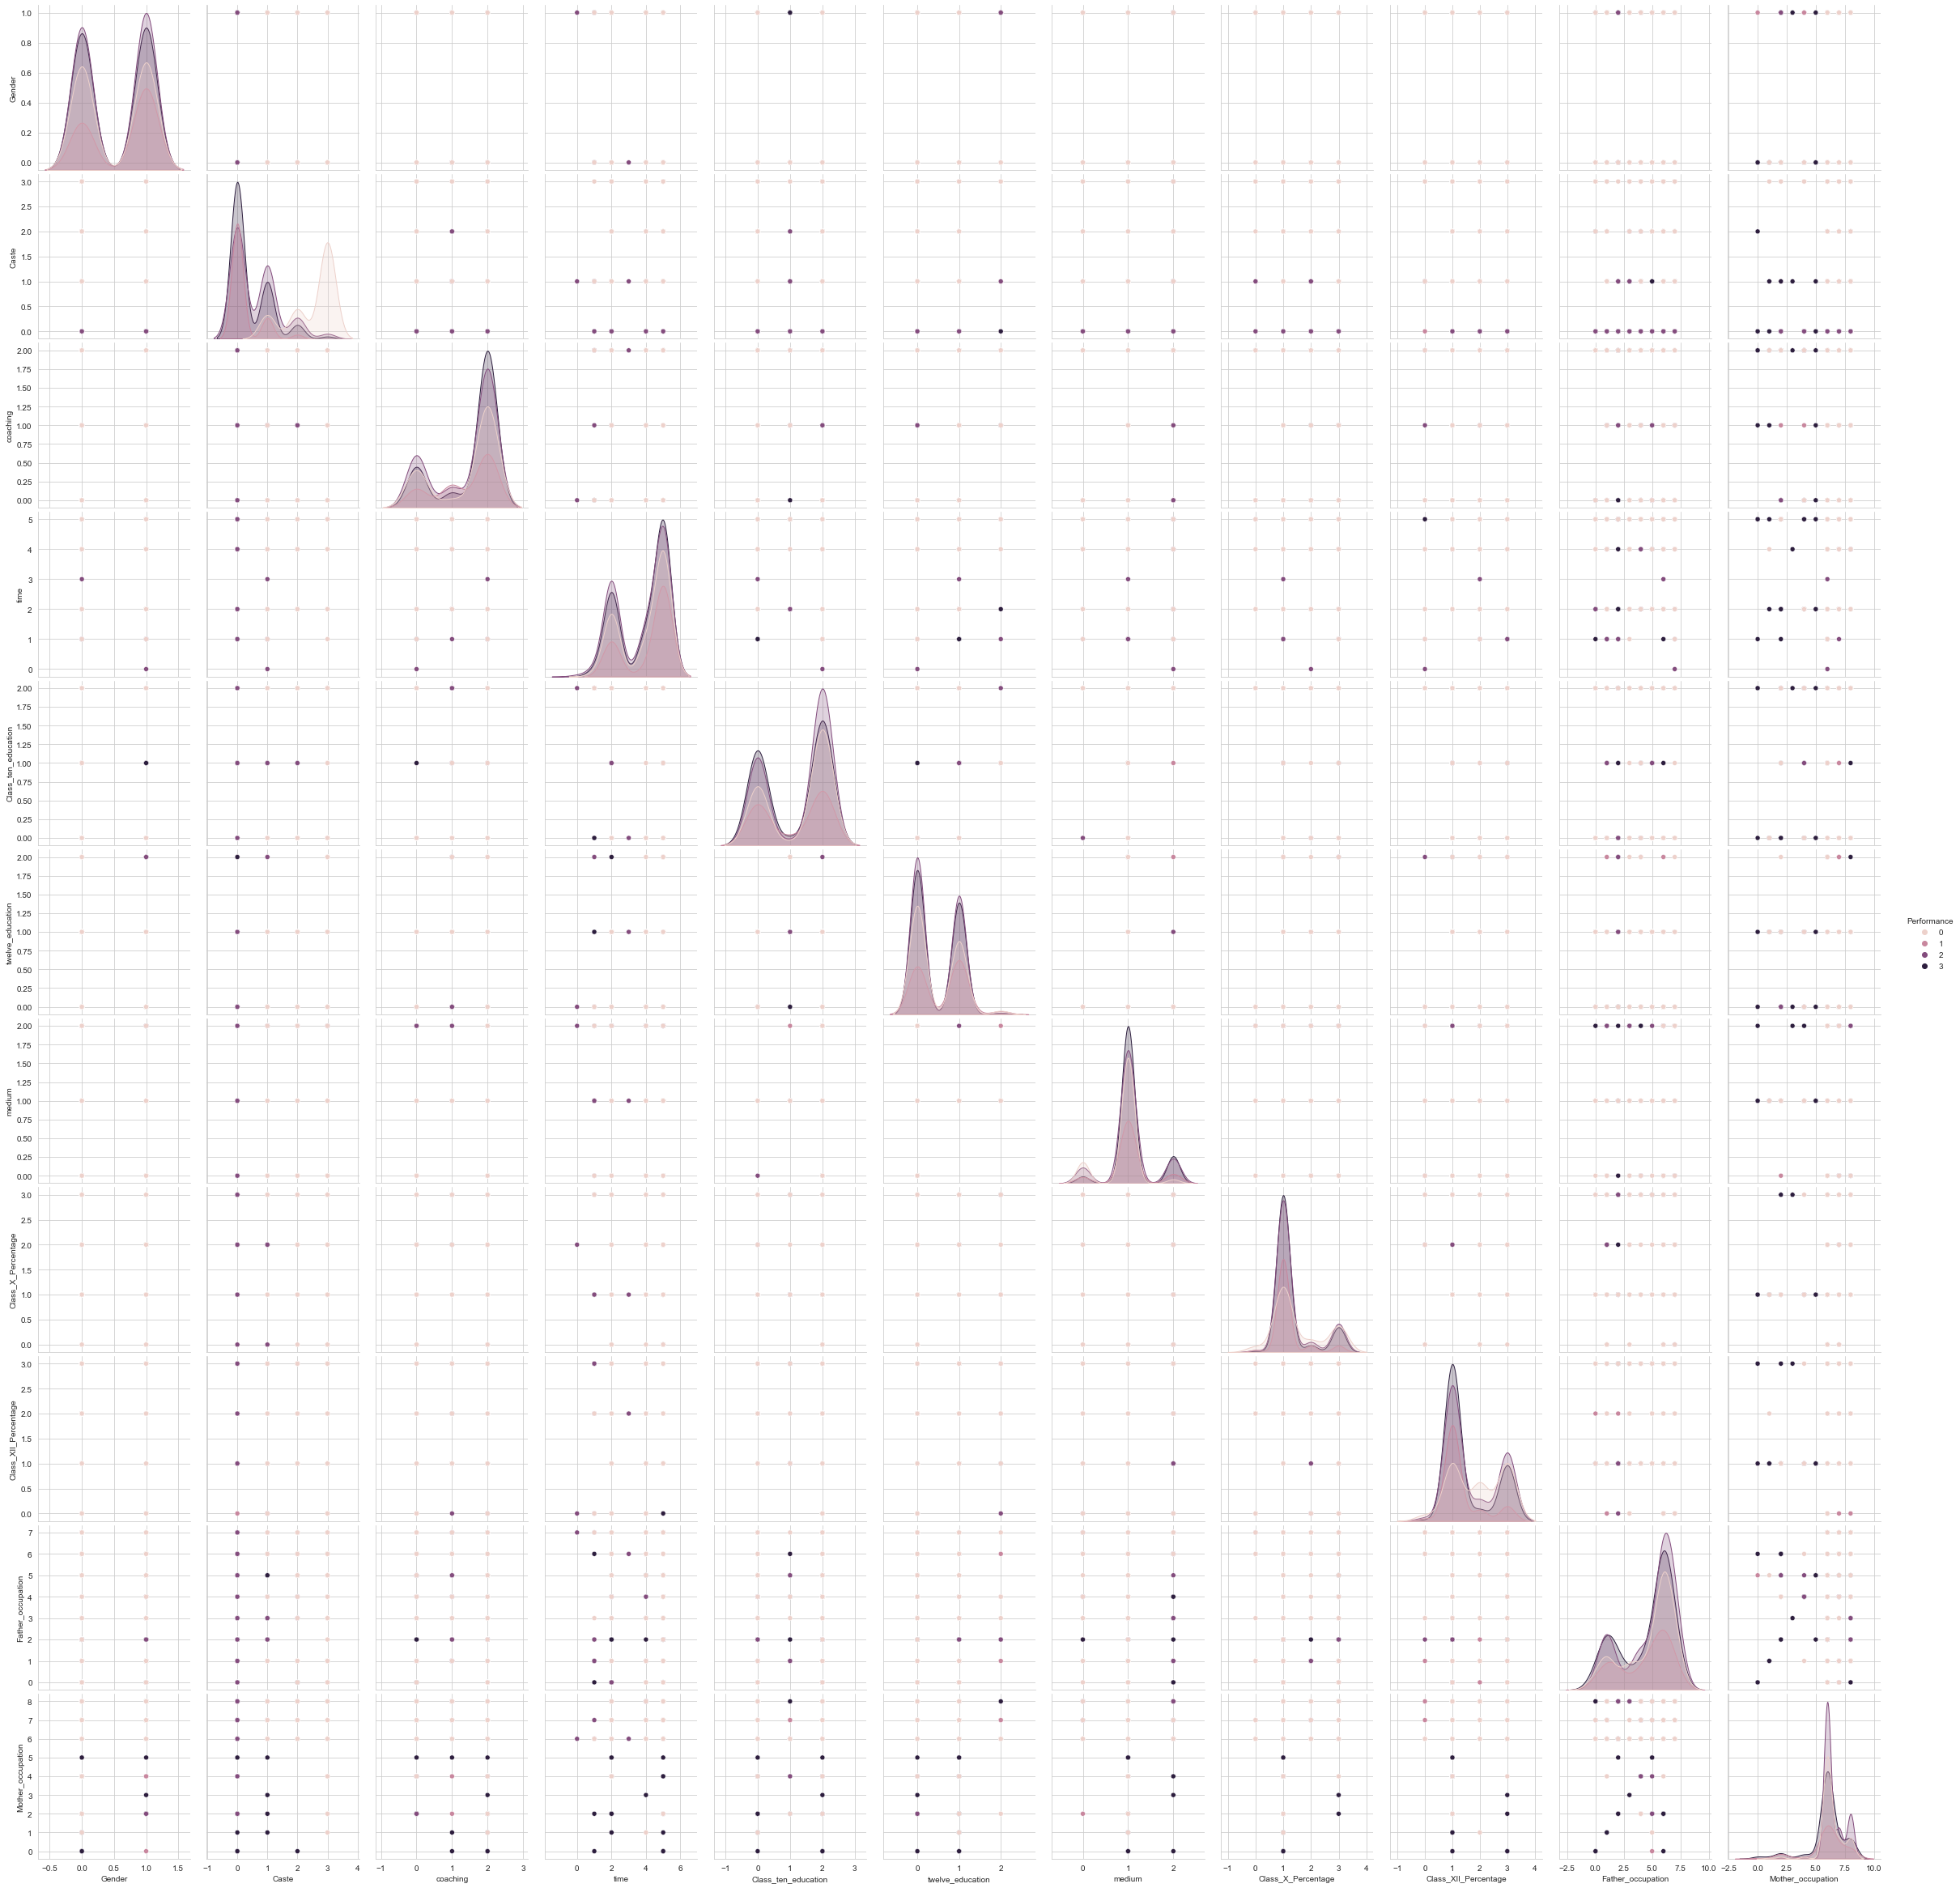

In [8]:
sns.set_style('whitegrid');
sns.pairplot(df, hue='Performance', height=3);
plt.show()

In [9]:
### This step not neccessary
x_data = df.drop(['Performance'],axis=1)
y_data = df['Performance']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['Gender','Caste','coaching','time','Class_ten_education','twelve_education','medium','Class_X_Percentage','Class_XII_Percentage','Father_occupation','Mother_occupation'])
df.head()

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,1,1,0,0,2,2,0,1,1,1,4,7
1,1,1,1,2,5,2,0,2,1,1,7,6
2,1,1,1,1,5,1,1,1,1,1,1,6
3,1,1,0,2,2,2,0,2,1,1,7,8
4,1,1,0,1,5,2,1,1,1,1,2,6


In [43]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[27  1  4  2]
 [ 0  4  7 13]
 [ 5  6 12 17]
 [ 2  6 14 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        34
           1       0.24      0.17      0.20        24
           2       0.32      0.30      0.31        40
           3       0.30      0.39      0.34        36

    accuracy                           0.43       134
   macro avg       0.41      0.41      0.41       134
weighted avg       0.42      0.43      0.42       134

Accuracy: 0.4253731343283582


In [44]:
KNN_model = KNeighborsClassifier(n_neighbors=10)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('accuracy of KNN ')
print(accuracy_score(KNN_prediction, y_test))

accuracy of KNN 
0.5373134328358209


In [45]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)
print(str(accuracy_score(SVC_prediction, y_test)))

0.47761194029850745


In [25]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [27]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [28]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  50.00
F1 (Polynomial Kernel):  47.61


In [29]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  40.30
F1 (RBF Kernel):  26.98


In [31]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5074626865671642
